In [1]:
%cd '/content/drive/MyDrive/Training AI/NLP Tutorial/Question Answering'

/content/drive/MyDrive/Training AI/NLP Tutorial/Question Answering


#Import Libraries

In [2]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input, Bidirectional, Concatenate
from tensorflow.keras.layers import AdditiveAttention

#Open dataset


In [3]:
line_path = "/content/drive/MyDrive/Training AI/NLP Tutorial/Question Answering/datasets/archive/cornell movie-dialogs corpus/movie_lines.txt"
conver_path = "/content/drive/MyDrive/Training AI/NLP Tutorial/Question Answering/datasets/archive/cornell movie-dialogs corpus/movie_conversations.txt"

In [4]:
lines = open(line_path, encoding='utf-8',
             errors='ignore').read().split('\n')

convers = open(conver_path, encoding='utf-8',
             errors='ignore').read().split('\n')

In [5]:
lines

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?',
 'L868 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ The "real you".',
 'L867 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ What good stuff?',
 "L866 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ I figured yo

In [6]:
print(len(lines))
print(len(convers))

304714
83098


#Preprocessing

In [7]:
convers[0].split(' +++$+++ ')[-1][1:-1].replace("'", '').replace(",","").split()

['L194', 'L195', 'L196', 'L197']

In [8]:
lines[0].split(' +++$+++ ')[-1].replace("'", '')

'They do not!'

In [9]:
exchn = []
for conver in convers:
    exchn.append(conver.split(' +++$+++ ')[-1][1:-1].replace("'", " ").replace(",","").split())


In [10]:
exchn

[['L194', 'L195', 'L196', 'L197'],
 ['L198', 'L199'],
 ['L200', 'L201', 'L202', 'L203'],
 ['L204', 'L205', 'L206'],
 ['L207', 'L208'],
 ['L271', 'L272', 'L273', 'L274', 'L275'],
 ['L276', 'L277'],
 ['L280', 'L281'],
 ['L363', 'L364'],
 ['L365', 'L366'],
 ['L367', 'L368'],
 ['L401', 'L402', 'L403'],
 ['L404', 'L405', 'L406', 'L407'],
 ['L575', 'L576'],
 ['L577', 'L578'],
 ['L662', 'L663'],
 ['L693', 'L694', 'L695'],
 ['L696', 'L697', 'L698', 'L699'],
 ['L860', 'L861'],
 ['L862', 'L863', 'L864', 'L865'],
 ['L866', 'L867', 'L868', 'L869'],
 ['L870', 'L871', 'L872'],
 ['L924', 'L925'],
 ['L984', 'L985'],
 ['L1044', 'L1045'],
 ['L49', 'L50', 'L51'],
 ['L571', 'L572', 'L573'],
 ['L579', 'L580'],
 ['L595', 'L596', 'L597'],
 ['L598', 'L599', 'L600'],
 ['L659', 'L660'],
 ['L952', 'L953'],
 ['L394', 'L395'],
 ['L396', 'L397'],
 ['L589', 'L590', 'L591'],
 ['L592', 'L593'],
 ['L756', 'L757', 'L758'],
 ['L759', 'L760'],
 ['L164', 'L165'],
 ['L319', 'L320'],
 ['L441', 'L442', 'L443', 'L444', 'L445']

In [11]:
diag = {}
for line in lines:
    diag[line.split(' +++$+++ ')[0]] = line.split(' +++$+++ ')[-1]

In [12]:
diag

{'L1045': 'They do not!',
 'L1044': 'They do to!',
 'L985': 'I hope so.',
 'L984': 'She okay?',
 'L925': "Let's go.",
 'L924': 'Wow',
 'L872': "Okay -- you're gonna need to learn how to lie.",
 'L871': 'No',
 'L870': 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869': 'Like my fear of wearing pastels?',
 'L868': 'The "real you".',
 'L867': 'What good stuff?',
 'L866': "I figured you'd get to the good stuff eventually.",
 'L865': 'Thank God!  If I had to hear one more story about your coiffure...',
 'L864': "Me.  This endless ...blonde babble. I'm like, boring myself.",
 'L863': 'What crap?',
 'L862': 'do you listen to this crap?',
 'L861': 'No...',
 'L860': 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."',
 'L699': 'You always been this selfish?',
 'L698': 'But',
 'L697': "Then that's all you had to say.",
 'L696': 'Well, no...',
 'L695': "You never wanted to go out with 'me, did y

In [13]:
del(lines, convers, conver, line)

In [14]:
questions = []
answers = []

for conver in exchn:
    for i in range(len(conver) - 1):
        questions.append(diag[conver[i]])
        answers.append(diag[conver[i+1]])

In [15]:
len_seq = 13

In [16]:
del(diag, exchn, conver, i)

In [17]:
sorted_ques = []
sorted_ans = []
for i in range(len(questions)):
    if len(questions[i]) < len_seq:
        # print(questions[i])
        sorted_ques.append(questions[i])
        sorted_ans.append(answers[i])

In [18]:
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    txt = re.sub(r"[^\w\s]", "", txt)
    return txt

In [19]:
clean_ques = []
clean_ans = []

for line in sorted_ques:
    clean_ques.append(clean_text(line))
    
for line in sorted_ans:
    clean_ans.append(clean_text(line))

for i in range(len(clean_ans)):
    clean_ans[i] = ' '.join(clean_ans[i].split()[:11])

In [20]:
clean_ques

['cameron',
 'why',
 'there',
 'sure have',
 'hi',
 'i was',
 'well no',
 'but',
 'what crap',
 'no',
 'wow',
 'she okay',
 'they do to',
 'no',
 'who',
 'great',
 'its more',
 'queen harry',
 'neat',
 'hi joey',
 'what',
 'why',
 'but',
 'that is not',
 'let go',
 'daddy i ',
 'daddy no',
 'why',
 'no but',
 'never',
 'thirtytwo',
 'get out',
 'who is she',
 'why not',
 'he is pretty',
 'sure',
 'away',
 'yeah',
 'i am on it',
 'what',
 'forget it',
 'do what',
 'hey',
 'whos that',
 'what is this',
 'you didnt',
 'who',
 'excuse me',
 'what is this',
 'okay',
 'i told you',
 'sure i do',
 'why',
 'who',
 'dorsey',
 'i hate him',
 'busy',
 'maybe',
 'do what',
 'who',
 'bianca',
 'wholesome',
 'unwelcome',
 'good call',
 'yes',
 'how',
 'fallacy',
 'the duck',
 'hearsay',
 'i hate peas',
 'what',
 'no',
 'no what',
 'why not',
 'you tell me',
 'oh huh',
 'what',
 'wait i',
 'i know',
 'no daddy',
 'parts of it',
 'which parts',
 'when i go',
 'tempestuous',
 'hi',
 'you think',
 'righ

In [21]:
print(len(clean_ques))
print(len(clean_ans))

31416
31416


In [22]:
del(answers, questions, line,sorted_ans, sorted_ques)

In [23]:
# trimming
clean_ans=clean_ans[:30000]
clean_ques=clean_ques[:30000]

In [24]:
#  Count Occurences 
word2count = {}

for line in clean_ques:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
            
for line in clean_ans:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

In [25]:
print(len(word2count))

15843


In [26]:
del(word, line)

In [27]:
thresh = 5
vocab = {}
word_num = 0
for word, count in word2count.items():
    if count >= thresh:
        vocab[word] = word_num
        word_num += 1

In [28]:
del(word2count, word, count, thresh,word_num)      

In [29]:
print(len(vocab))

3023


In [30]:
vocab

{'cameron': 0,
 'why': 1,
 'there': 2,
 'sure': 3,
 'have': 4,
 'hi': 5,
 'i': 6,
 'was': 7,
 'well': 8,
 'no': 9,
 'but': 10,
 'what': 11,
 'crap': 12,
 'wow': 13,
 'she': 14,
 'okay': 15,
 'they': 16,
 'do': 17,
 'to': 18,
 'who': 19,
 'great': 20,
 'its': 21,
 'more': 22,
 'queen': 23,
 'harry': 24,
 'neat': 25,
 'joey': 26,
 'that': 27,
 'is': 28,
 'not': 29,
 'let': 30,
 'go': 31,
 'daddy': 32,
 'never': 33,
 'get': 34,
 'out': 35,
 'he': 36,
 'pretty': 37,
 'away': 38,
 'yeah': 39,
 'am': 40,
 'on': 41,
 'it': 42,
 'forget': 43,
 'hey': 44,
 'whos': 45,
 'this': 46,
 'you': 47,
 'didnt': 48,
 'excuse': 49,
 'me': 50,
 'told': 51,
 'hate': 52,
 'him': 53,
 'busy': 54,
 'maybe': 55,
 'good': 56,
 'call': 57,
 'yes': 58,
 'how': 59,
 'the': 60,
 'duck': 61,
 'tell': 62,
 'oh': 63,
 'huh': 64,
 'wait': 65,
 'know': 66,
 'parts': 67,
 'of': 68,
 'which': 69,
 'when': 70,
 'think': 71,
 'right': 72,
 'say': 73,
 'plan': 74,
 'father': 75,
 'chief': 76,
 'knows': 77,
 'thousands': 78,
 

In [31]:
for i in range(len(clean_ans)):
    clean_ans[i] = '<SOS> ' + clean_ans[i] + ' <EOS>'

tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)

for token in tokens:
    vocab[token] = x
    x += 1
    
vocab['cameron'] = vocab['<PAD>']
vocab['<PAD>'] = 0

In [32]:
# Inverse Answers Dictionary 
inv_vocab = {w:v for v, w in vocab.items()}

In [33]:
encoder_inp = []
for line in clean_ques:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

In [34]:
decoder_inp = []
for line in clean_ans:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

In [35]:
del(clean_ans, clean_ques, line, lst, word)

# Padding the inputs for LSTM Model

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
encoder_inp = pad_sequences(encoder_inp, len_seq, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, len_seq, padding='post', truncating='post')
decoder_final_output = []

In [38]:
print(encoder_inp[0])
print(encoder_inp[1])
print(encoder_inp[3])
print(encoder_inp[4])
print(encoder_inp[5])

[3023    0    0    0    0    0    0    0    0    0    0    0    0]
[1 0 0 0 0 0 0 0 0 0 0 0 0]
[3 4 0 0 0 0 0 0 0 0 0 0 0]
[5 0 0 0 0 0 0 0 0 0 0 0 0]
[6 7 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
print(decoder_inp[1])
print(decoder_inp[2])
print(decoder_inp[3])
print(decoder_inp[4])

[3026 3025  938   14 1042   18  227  125 2234   70   14 2235 3024]
[3026  151 3024    0    0    0    0    0    0    0    0    0    0]
[3026    6  125  125  125 1035   31   10    6  235   29   29 3024]
[3026 1482  364  883  986   35  105   64 3024    0    0    0    0]


In [40]:
for i in decoder_inp:
    decoder_final_output.append(i[1:]) 
decoder_final_output = pad_sequences(decoder_final_output, len_seq, padding='post', truncating='post')

In [41]:
decoder_final_output[1]

array([3025,  938,   14, 1042,   18,  227,  125, 2234,   70,   14, 2235,
       3024,    0], dtype=int32)

In [42]:
len(decoder_final_output)

30000

In [43]:
# Label Encoding
decoder_final_output = to_categorical(decoder_final_output, len(vocab))
print(decoder_final_output.shape)

(30000, 13, 3027)


In [44]:
decoder_final_output[1].shape

(13, 3027)

In [45]:
print(decoder_final_output.shape)

(30000, 13, 3027)


# Creating Encoding Model Using LSTM

##Input

###Define

In [46]:
enc_inp = Input(shape=(len_seq, ))
dec_inp = Input(shape=(len_seq, ))

###Example

In [47]:
enc_inp

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_1')>

In [48]:
sample_enc_inp = tf.random.uniform([13])
sample_enc_inp

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([0.7001265 , 0.4970715 , 0.6055653 , 0.7484348 , 0.00121987,
       0.6239786 , 0.78449583, 0.6244222 , 0.6705291 , 0.8587234 ,
       0.16885614, 0.07220101, 0.6561794 ], dtype=float32)>

##Embedding

###Define

In [49]:
VOCAB_SIZE = len(vocab)
embed = Embedding(VOCAB_SIZE+1, output_dim=50, 
                  input_length=len_seq,
                  trainable=True                  
                  )


###Example

In [50]:
sample_embed_output = embed(sample_enc_inp)
print('Sample Input shape:',sample_enc_inp.shape)
print('Embedding shape:',sample_embed_output.shape)
print('Sample Embedding output:',sample_embed_output)


Sample Input shape: (13,)
Embedding shape: (13, 50)
Sample Embedding output: tf.Tensor(
[[ 0.01936317 -0.01088672 -0.04592518  0.04225529 -0.02150883 -0.02451255
   0.04323376  0.04236109 -0.02838469 -0.01695157  0.04597339 -0.00625571
  -0.02547598  0.02164024 -0.03197128  0.01661642 -0.00154318 -0.02228051
   0.03335586 -0.04345443 -0.01828034 -0.0427439  -0.03989242  0.0277716
  -0.0080427   0.03956682 -0.00892466  0.04158759 -0.01139046 -0.04677073
  -0.02946305 -0.03070389  0.00944073 -0.00595182  0.00897158 -0.00444914
  -0.01971393  0.02457816 -0.00492668 -0.00213995  0.02259708  0.0439817
   0.03988191 -0.03934822 -0.02032069 -0.03374827 -0.02982423  0.00772643
  -0.03224834  0.00532309]
 [ 0.01936317 -0.01088672 -0.04592518  0.04225529 -0.02150883 -0.02451255
   0.04323376  0.04236109 -0.02838469 -0.01695157  0.04597339 -0.00625571
  -0.02547598  0.02164024 -0.03197128  0.01661642 -0.00154318 -0.02228051
   0.03335586 -0.04345443 -0.01828034 -0.0427439  -0.03989242  0.0277716


##Encoder

###Define

In [51]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, input_vocab_size, embedding_dim, enc_units, len_seq,**kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.enc_units = enc_units
        self.input_vocab_size = input_vocab_size
        self.len_seq = len_seq
        self.embedding_dim = embedding_dim
        
        self.embed = Embedding(self.input_vocab_size, output_dim=self.embedding_dim, 
                  input_length=self.len_seq,
                  trainable=True                  
                  )
        self.enc_lstm = Bidirectional(LSTM(self.enc_units, return_state=True, dropout=0.05, return_sequences = True))

    def call(self, enc_inp, state=None):
        enc_embed = self.embed(enc_inp)
        encoder_outputs, forward_h, forward_c, backward_h, backward_c = self.enc_lstm(enc_embed)
        state_h = Concatenate()([forward_h, backward_h])
        state_c = Concatenate()([forward_c, backward_c])

        enc_states = [state_h, state_c]

        return encoder_outputs, enc_states

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'input_vocab_size': self.input_vocab_size, 
            'embedding_dim': self.embedding_dim, 
            'enc_units': self.enc_units, 
            'len_seq': self.len_seq
        })
        return config

        


In [52]:
encoder = Encoder(
    input_vocab_size=VOCAB_SIZE+1, 
    embedding_dim=50, 
    enc_units=400,
    len_seq=13
)

In [53]:
encoder_outputs, enc_states = encoder(enc_inp)

In [54]:
# enc_embed = embed(enc_inp)
# enc_lstm = Bidirectional(LSTM(400, return_state=True, dropout=0.05, return_sequences = True))

# encoder_outputs, forward_h, forward_c, backward_h, backward_c = enc_lstm(enc_embed)

# state_h = Concatenate()([forward_h, backward_h])
# state_c = Concatenate()([forward_c, backward_c])

# enc_states = [state_h, state_c]

###Example

In [55]:
sample_encoder = Encoder(
    input_vocab_size=VOCAB_SIZE+1, 
    embedding_dim=50, 
    enc_units=400,
    len_seq=13
)

In [56]:
sample_encoder_output, sample_states = sample_encoder(
    tf.random.uniform((64,13))
)
sample_encoder_outputs = sample_encoder_output
sample_state_h = sample_states[0]
sample_state_c = sample_states[1]
print('Encoder output shape:',sample_encoder_outputs.shape)
print('State_h output shape:',sample_state_h.shape)
print('State_c output shape:',sample_state_c.shape)

Encoder output shape: (64, 13, 800)
State_h output shape: (64, 800)
State_c output shape: (64, 800)


In [57]:
# sample_encoder_output = enc_lstm(
#     tf.random.uniform((1, 13, 50))
# )
# sample_encoder_outputs = sample_encoder_output[0]
# sample_forward_h = sample_encoder_output[1]
# sample_forward_c = sample_encoder_output[2]
# sample_backward_h = sample_encoder_output[3]
# sample_backward_c = sample_encoder_output[4]
# print('Encoder output shape:',sample_encoder_outputs.shape)
# print('Forward_h output shape:',sample_forward_h.shape)
# print('Forward_c output shape:',sample_forward_c.shape)
# print('Backward_h output shape:',sample_backward_h.shape)
# print('Backward_c output shape:',sample_backward_c.shape)

In [58]:
# sample_state_h = Concatenate()([sample_forward_h, sample_backward_h])
# sample_state_c = Concatenate()([sample_forward_h, sample_backward_h])

# print('State_h shape:',sample_state_h.shape)
# print('State_c shape:',sample_state_c.shape)

In [59]:
# sample_enc_states = [sample_state_h, sample_state_c]
# print('Encoder state shape:',len(sample_enc_states))
# sample_enc_states

##Attention Layer

###Define

In [60]:
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        # units=400*2
        self.W1 = tf.keras.layers.Dense(units, use_bias=False)
        self.W2 = tf.keras.layers.Dense(units, use_bias=False)

        self.attn_layer = AdditiveAttention(use_scale=True) 

    def call(self, query, value):
        w1_query = self.W1(query)
        w2_key = self.W2(value)
        context_vector, attention_weights = self.attn_layer(
            [w1_query, value, w2_key],
            return_attention_scores = True
        )

        return context_vector, attention_weights


###Example

In [61]:
sample_attn = AttentionLayer(units=800)

In [62]:
sample_output = tf.random.uniform((1,13,800))
sample_encoder_outputs = tf.random.uniform((1,13,800))

In [63]:
sample_context_vector, sample_attention_weights = sample_attn(
    query=sample_output,
    value=sample_encoder_outputs
)

In [64]:
print('Context vector shape:', sample_context_vector.shape)
print('Attention weight shape:', sample_attention_weights.shape)

Context vector shape: (1, 13, 800)
Attention weight shape: (1, 13, 13)


In [65]:
# sample_w1_query = W1(sample_output)
# sample_w2_key = W2(sample_encoder_outputs)
# sample_context_vector, sample_attention_weights = attn_layer(
#     [sample_w1_query, sample_encoder_outputs, sample_w2_key],
#     return_attention_scores = True
# )

# print('Context vector shape:', sample_context_vector.shape)
# print('Attention weight shape:', sample_attention_weights.shape)
# print('W1 query shape:', sample_w1_query.shape)

##Decoder

###Define

In [66]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, output_vocab_size, embedding_dim, dec_units, len_seq, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.dec_units = dec_units
        self.output_vocab_size = output_vocab_size
        self.embedding_dim = embedding_dim
        self.len_seq = len_seq

        self.embed = Embedding(self.output_vocab_size, output_dim=embedding_dim, 
            input_length=self.len_seq,
            trainable=True                  
        )
        # dec_units=400*2
        self.dec_lstm = LSTM(dec_units, return_state=True, return_sequences=True, dropout=0.05)
        self.attention = AttentionLayer(self.dec_units)

        self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh,
                                    use_bias=False)
        
        self.fc = tf.keras.layers.Dense(self.output_vocab_size, activation='softmax')

    def call(self, dec_inp, enc_output, state=None):
        dec_embed = self.embed(dec_inp)
        output, h, c = self.dec_lstm(dec_embed, initial_state=state)

        context_vector, attention_weights = self.attention(
            query=output, value=enc_output
        )


        decoder_concat_input = Concatenate(axis=-1)([context_vector, output])

        attention_vector = self.Wc(decoder_concat_input)
        logits = self.fc(attention_vector)
        state = [h, c]
        return logits, attention_weights, state

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'output_vocab_size':self.output_vocab_size, 
            'embedding_dim':self.embedding_dim, 
            'dec_units':self.dec_units, 
            'len_seq':self.len_seq
        })
        return config

In [67]:
decoder = Decoder(
    VOCAB_SIZE,
    embedding_dim=50, 
    dec_units=400*2,
    len_seq=13
)

In [68]:
logits, attention_weights, state = decoder(
    dec_inp=dec_inp,
    enc_output=encoder_outputs, 
    state=enc_states
)

###Example

In [69]:
start_index = vocab['<SOS>']
first_token = tf.constant([[start_index]] * sample_encoder_output.shape[0])
first_token.shape

TensorShape([64, 1])

In [70]:
sample_output, sample_attention_weights, sample_state = decoder(
    dec_inp=first_token,
    enc_output=sample_encoder_output,
    state=sample_states
)

In [71]:
sample_encoder_output.shape

TensorShape([64, 13, 800])

In [72]:
print(f'Output shape: (batch_size, t, output_vocab_size) {sample_output.shape}')
print(f'State_h shape: (batch_size, dec_units) {sample_state[0].shape}')
print(f'State_c shape: (batch_size, dec_units) {sample_state[1].shape}')

Output shape: (batch_size, t, output_vocab_size) (64, 1, 3027)
State_h shape: (batch_size, dec_units) (64, 800)
State_c shape: (batch_size, dec_units) (64, 800)


In [73]:
sampled_token = tf.random.categorical(sample_output[:, 0, :], num_samples=1)
first_word = [inv_vocab[x] for x in sampled_token.numpy().squeeze(axis=-1)]
first_word[:5]

['yourself', 'grady', 'hanging', 'goodness', 'women']

In [74]:
# dec_inp = Input(shape=(13, ))
# dec_embed = embed(dec_inp)
# dec_lstm = LSTM(400*2, return_state=True, return_sequences=True, dropout=0.05)
# output, _, _ = dec_lstm(dec_embed, initial_state=enc_states)

In [75]:
# decoder_concat_input = Concatenate(axis=-1)([context_vector, output])

In [76]:
# Wc = tf.keras.layers.Dense(400*2, activation=tf.math.tanh,
#                                     use_bias=False)

In [77]:
# attention_vector = Wc(decoder_concat_input)

In [78]:
# sample_decoder_output = dec_lstm(
#     tf.random.uniform((1, 13, 50)), initial_state=sample_enc_states
# )
# print('Decoder output shape:',sample_decoder_output[0].shape)

In [79]:
# sample_decoder_concat_input = Concatenate(axis=-1)([sample_context_vector, sample_output])

# print(sample_decoder_concat_input.shape)

In [80]:
# sample_attention_vector = Wc(sample_decoder_concat_input)

# print(sample_attention_vector.shape)

In [81]:
# dec_dense = Dense(VOCAB_SIZE, activation='softmax')
# final_output = dec_dense(attention_vector)

In [82]:
# sample_attention_vector = tf.random.uniform((1, 13,800))
# sample_output = dec_dense(sample_attention_vector)

# print('Output shape:', sample_output.shape)

#Model

In [83]:
model = Model([enc_inp, dec_inp], logits)

In [84]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [85]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 encoder (Encoder)              ((None, 13, 800),    1594600     ['input_1[0][0]']                
                                 [(None, 800),                                                    
                                 (None, 800)])                                                    
                                                                                              

In [86]:
import time
start = time.time()
H = model.fit([encoder_inp, decoder_inp],decoder_final_output,epochs=50, batch_size=128)
training_time = time.time() - start

Epoch 1/50
235/235 [==============================] - 21s 58ms/step - loss: 3.3192 - acc: 0.4694
Epoch 2/50
235/235 [==============================] - 13s 56ms/step - loss: 2.8581 - acc: 0.5126
Epoch 3/50
235/235 [==============================] - 13s 56ms/step - loss: 2.6966 - acc: 0.5332
Epoch 4/50
235/235 [==============================] - 13s 57ms/step - loss: 2.6112 - acc: 0.5416
Epoch 5/50
235/235 [==============================] - 14s 58ms/step - loss: 2.5510 - acc: 0.5458
Epoch 6/50
235/235 [==============================] - 14s 58ms/step - loss: 2.4982 - acc: 0.5491
Epoch 7/50
235/235 [==============================] - 13s 57ms/step - loss: 2.4521 - acc: 0.5521
Epoch 8/50
235/235 [==============================] - 13s 57ms/step - loss: 2.4089 - acc: 0.5545
Epoch 9/50
235/235 [==============================] - 13s 57ms/step - loss: 2.3663 - acc: 0.5574
Epoch 10/50
235/235 [==============================] - 13s 57ms/step - loss: 2.3251 - acc: 0.5600
Epoch 11/50
235/235 [========

In [87]:
training_time

693.6489100456238

In [87]:
H.history.items()

dict_items([('loss', [3.3011014461517334, 2.8509647846221924, 2.688115119934082, 2.6074845790863037, 2.550762414932251, 2.4964418411254883, 2.4505293369293213, 2.4085659980773926, 2.3657634258270264, 2.323768377304077, 2.277409315109253, 2.2295596599578857, 2.176159143447876, 2.115736722946167, 2.0452446937561035, 1.9593524932861328, 1.8589801788330078, 1.744876503944397, 1.6214481592178345, 1.496909737586975, 1.3741340637207031, 1.2624435424804688, 1.1600180864334106, 1.0688332319259644, 0.9915366768836975, 0.9229029417037964, 0.8611990809440613, 0.8087815642356873, 0.7622778415679932, 0.7223013043403625, 0.6906808614730835, 0.6585743427276611, 0.6324895620346069, 0.6092899441719055, 0.5874326229095459, 0.5716278553009033, 0.5535116791725159, 0.5374994874000549, 0.5230684280395508, 0.5119057297706604, 0.5019052028656006, 0.49097031354904175, 0.48636820912361145, 0.480695515871048, 0.4734207093715668, 0.4665662944316864, 0.4606189429759979, 0.4546739459037781, 0.45148736238479614, 0.44

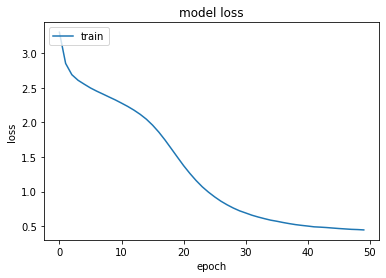

In [88]:
import matplotlib.pyplot as plt 
plt.plot(H.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

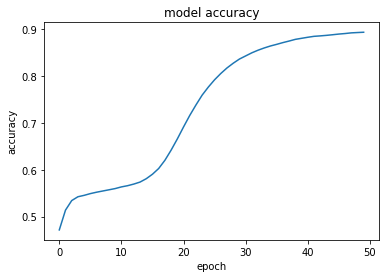

In [89]:
import matplotlib.pyplot as plt 
plt.plot(H.history['acc'])
# plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Test

##Define

In [88]:
enc_model = tf.keras.models.Model(enc_inp, [encoder_outputs, enc_states])



In [89]:
enc_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 encoder (Encoder)           ((None, 13, 800),         1594600   
                              [(None, 800),                      
                              (None, 800)])                      
                                                                 
Total params: 1,594,600
Trainable params: 1,594,600
Non-trainable params: 0
_________________________________________________________________


In [90]:
encoder_outputs.shape

TensorShape([None, 13, 800])

In [91]:
decoder_state_input_h = tf.keras.layers.Input(shape=( 400 * 2,))
decoder_state_input_c = tf.keras.layers.Input(shape=( 400 * 2,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_enc_output_inputs = tf.keras.layers.Input(shape=( len_seq, 400 * 2,))

decoder_outputs, attention_weights, decoder_states = decoder(
    dec_inp=dec_inp,
    enc_output=decoder_enc_output_inputs, 
    state=decoder_states_inputs
)


#decoder_output = dec_dense(decoder_outputs)

dec_model = tf.keras.models.Model([dec_inp, decoder_enc_output_inputs] + decoder_states_inputs,
                                      [decoder_outputs, attention_weights]+ decoder_states)

In [92]:
dec_model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [93]:
dec_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 13, 800)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 800)]        0           []                               
                                                                                            

In [ ]:
dec_model.save('decoder_model.h5')
enc_model.save('encoder_model.h5')

##Inference

In [94]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    
    prepro1 = input("you : ")
    try:
        prepro1 = clean_text(prepro1)
        prepro = [prepro1]
        
        txt = []
        for x in prepro:
            lst = []
            for y in x.split():
                try:
                    lst.append(vocab[y])
                except:
                    lst.append(vocab['<OUT>'])
            txt.append(lst)
        txt = pad_sequences(txt, 13, padding='post')


        ###
        enc_op, stat = enc_model.predict( txt )

        # empty_target_seq = np.zeros( ( 1 , 1) )
        # empty_target_seq[0, 0] = vocab['<SOS>']

        start_index = vocab['<SOS>']
        empty_target_seq = tf.constant([[start_index]])
        stop_condition = False
        decoded_translation = ''


        while not stop_condition :

            dec_outputs , attention_weights, decoder_states_h, decoder_states_c = dec_model.predict([ empty_target_seq, enc_op ] + stat )

            ###
            ###########################
            # w1_query_op = W1(dec_outputs)
            # w2_key_op = W2(enc_op)

            # context_vector_op, attn_weight_op = attn_layer(
            #     [w1_query_op, enc_op, w2_key_op],
            #     return_attention_scores = True
            # )
            # decoder_concat_input = Concatenate(axis=-1)([context_vector_op, dec_outputs])
            # decoder_concat_input = Wc(decoder_concat_input)
            # decoder_concat_input = dec_dense(decoder_concat_input)
            ###########################

            sampled_word_index = np.argmax( dec_outputs[0, -1, :] )

            sampled_word = inv_vocab[sampled_word_index] + ' '

            if sampled_word != '<EOS> ':
                decoded_translation += sampled_word           


            if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
                stop_condition = True

            # empty_target_seq = np.zeros( ( 1 , 1 ) )  
            empty_target_seq = tf.constant([[sampled_word_index]])
            stat = [decoder_states_h, decoder_states_c]

        print("chatbot attention : ", decoded_translation )
        print("==============================================")

    except:
        print("sorry didn't got you , please type again :( ")

##########################################
#       start chatting ver. 1.0          #
##########################################
you : Hi
chatbot attention :  hi 
you : Hello
chatbot attention :  <OUT> 
you : Who are you
chatbot attention :  i am your son 
you : How could you be my son
chatbot attention :  <OUT> no other 
you : I have a daughter
chatbot attention :  you want a man you got a <OUT> you have a 
you : I love you son
chatbot attention :  yeah am you really bad 
you : I love you
chatbot attention :  i love you walter did anyone ever call you anything other 
you : Do you have a crush
chatbot attention :  no 
you : I have a crush
chatbot attention :  the <OUT> came to your house he is got a bit 
you : I have a crush that is you
chatbot attention :  you have a <OUT> you didnt have a hard choice your 
you : Do you want to sleep
chatbot attention :  no 
you : Good night
chatbot attention :  goodbye 
you : Good morning
chatbot attention :  i thought i would stay the night 
you : G

In [ ]:
with tf.keras.utils.custom_object_scope({'Decoder': Decoder}):
    new_dec = tf.keras.models.load_model('decoder_model.h5')

In [ ]:
with tf.keras.utils.custom_object_scope({'Encoder': Encoder}):
    new_enc = tf.keras.models.load_model('encoder_model.h5')


In [ ]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    
    prepro1 = input("you : ")
    try:
        prepro1 = clean_text(prepro1)
        prepro = [prepro1]
        
        txt = []
        for x in prepro:
            lst = []
            for y in x.split():
                try:
                    lst.append(vocab[y])
                except:
                    lst.append(vocab['<OUT>'])
            txt.append(lst)
        txt = pad_sequences(txt, 13, padding='post')


        ###
        enc_op, stat = new_enc.predict( txt )

        # empty_target_seq = np.zeros( ( 1 , 1) )
        # empty_target_seq[0, 0] = vocab['<SOS>']

        start_index = vocab['<SOS>']
        empty_target_seq = tf.constant([[start_index]])
        stop_condition = False
        decoded_translation = ''


        while not stop_condition :

            dec_outputs , attention_weights, decoder_states_h, decoder_states_c = new_dec.predict([ empty_target_seq, enc_op ] + stat )

            ###
            ###########################
            # w1_query_op = W1(dec_outputs)
            # w2_key_op = W2(enc_op)

            # context_vector_op, attn_weight_op = attn_layer(
            #     [w1_query_op, enc_op, w2_key_op],
            #     return_attention_scores = True
            # )
            # decoder_concat_input = Concatenate(axis=-1)([context_vector_op, dec_outputs])
            # decoder_concat_input = Wc(decoder_concat_input)
            # decoder_concat_input = dec_dense(decoder_concat_input)
            ###########################

            sampled_word_index = np.argmax( dec_outputs[0, -1, :] )

            sampled_word = inv_vocab[sampled_word_index] + ' '

            if sampled_word != '<EOS> ':
                decoded_translation += sampled_word           


            if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
                stop_condition = True

            # empty_target_seq = np.zeros( ( 1 , 1 ) )  
            empty_target_seq = tf.constant([[sampled_word_index]])
            stat = [decoder_states_h, decoder_states_c]

        print("chatbot attention : ", decoded_translation )
        print("==============================================")

    except:
        print("sorry didn't got you , please type again :( ")

##########################################
#       start chatting ver. 1.0          #
##########################################
you : hello


chatbot attention :  hi its me just who you wanted to talk to right 
you : how can you know
chatbot attention :  no 
you : Do you know
chatbot attention :  no 
you : I love you
chatbot attention :  i love you walter did anyone ever call you anything other 
you : I love you too
chatbot attention :  i love you dad i feel well i have to but 
you : I want to kiss you
chatbot attention :  edward that is okay 
you : hello
chatbot attention :  hi its me just who you wanted to talk to right 
you : what's your name?
chatbot attention :  the baby the hell theres a football program 
you : Your name
chatbot attention :  thomas kent i would like to do a speech by a 
you : Remember
chatbot attention :  no that was years ago i have lived years since then 
you : How old are you
chatbot attention :  17 
you : Bye never want to see you
chatbot attention :  i am <OUT> 
you : Bye forever
chatbot attention :  and thanks 
you : Bye
chatbot attention :  bye 
you : q
chatbot attention :  i am <OUT> 
